<a href="https://colab.research.google.com/github/alizul01/machine-learning-course/blob/main/neural_network_mnist_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Purpose

Train neural network for MNIST dataset and also... ML JTI Taks

With me Muhammad Ali Zulfikar and TI-3H

## Library Area

In [ ]:
!pip install keras_sequential_ascii

In [41]:
import pandas as pd
import cv2 as cv
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from scipy.stats import entropy
from sklearn.cluster import KMeans
from keras_sequential_ascii import keras2ascii
from google.colab.patches import cv2_imshow

## Preprocessing Dataset

Load dataset langsung pakai bawaan tensorflow biar bisa kesplit dari awal



In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print(f"Train datasets shape is {X_train.shape} and the test datasets shape is {X_test.shape}")

Train datasets shape is (60000, 28, 28) and the test datasets shape is (10000, 28, 28)


*   Well yes, memang kalau pakai bawaan langsung tersplit 60000 training data dan 10000 testing dataset.
*   Foto MNIST memiliki resolusi 28 x 28 px



### Menampilkann Data

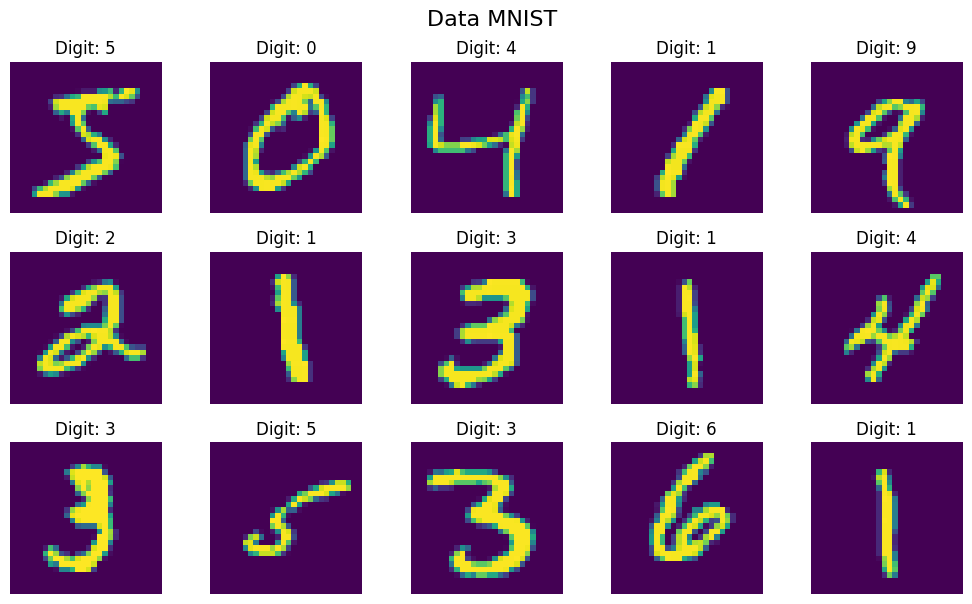

In [12]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle("Data MNIST", fontsize=16)

for i in range(15):
    plt.subplot(5, 5, i+1)
    plt.tight_layout()
    plt.imshow(X_train[i].reshape(28, 28), cmap='viridis')
    plt.title("Digit: {}".format(y_train[i]))
    plt.axis('off')

plt.show()

In [13]:
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

## Modelling

Di sini mencoba untuk pakai Sequential, bawaan dari Keras

In [18]:
model = Sequential()

In [19]:
model.add(Flatten(input_shape = (28, 28)))

* Dalam konteks klasifikasi gambar, seperti yang sering digunakan dalam MNIST dataset, setiap gambar adalah array 2D (misalnya, 28x28 piksel).

* Untuk memasukkannya ke dalam layer fully connected, kita menggunakan "Flatten" untuk mengubahnya menjadi vektor 1D (784 elemen).


In [20]:
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))

![ReLU Activation](https://www.researchgate.net/publication/325578703/figure/fig11/AS:634216538705921@1528220414102/Gambar-4-Fungsi-Aktivasi-ReLU.png)

**ReLU** digunakan sebagai fungsi aktivasi karena ini adalah pilihan umum dan sering memberikan hasil yang baik dalam berbagai tugas. Namun, dalam beberapa kasus, fungsi aktivasi lain seperti sigmoid atau tanh juga dapat digunakan tergantung pada kebutuhan dan karakteristik masalah.

Jadi, penggunaan ReLU dalam layer "Dense" bertujuan untuk memperkenalkan sifat non-linear ke dalam jaringan, yang penting untuk pemodelan data yang kompleks.



In [21]:
model.add(Dense(units = 10, activation = 'softmax'))

Alasan penggunaan softmax adalah karena ini cocok untuk tugas klasifikasi yang melibatkan beberapa kelas. Softmax akan menghasilkan probabilitas untuk setiap kelas, dan kelas dengan probabilitas tertinggi akan dianggap sebagai prediksi yang benar

#### Jumlah Unit (10 Unit):

Dalam tugas klasifikasi multiclass, jumlah unit dalam layer output sesuai dengan jumlah kelas yang ingin diprediksi. Pada MNIST dataset, terdapat 10 kelas (digit 0 hingga 9), sehingga kita memiliki 10 unit dalam layer ini, masing-masing mewakili probabilitas prediksi untuk setiap digit.


### Melihat Bentuk Model

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Fit and Compile

Sebelum fit train dan testing model, kita perlu mengcompile menggunakan metode adam. Ynag mana metode ini digunakan untuk reduce loss dan improve akurasi

In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.fit(X_train, y_train, epochs=10, batch_size=100)

Epoch 1/10
600/600 [==============================] - 5s 6ms/step - loss: 0.3370 - accuracy: 0.9064
Epoch 2/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1353 - accuracy: 0.9592
Epoch 3/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0931 - accuracy: 0.9714
Epoch 4/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0698 - accuracy: 0.9786
Epoch 5/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0542 - accuracy: 0.9833
Epoch 6/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0416 - accuracy: 0.9876
Epoch 7/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0343 - accuracy: 0.9893
Epoch 8/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0266 - accuracy: 0.9919
Epoch 9/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0199 - accuracy: 0.9940
Epoch 10/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0175 - accuracy: 0.9944

## Model Evaluation

In [25]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0982 - accuracy: 0.9743


In [27]:
print(f"Jumlah loss : {loss * 100}% dan accuracy adalah : {accuracy * 100}%")

Jumlah loss : 9.815166145563126% dan accuracy adalah : 97.43000268936157%


## Predict

In [28]:
predict = model.predict([X_test])

313/313 [==============================] - 2s 7ms/step


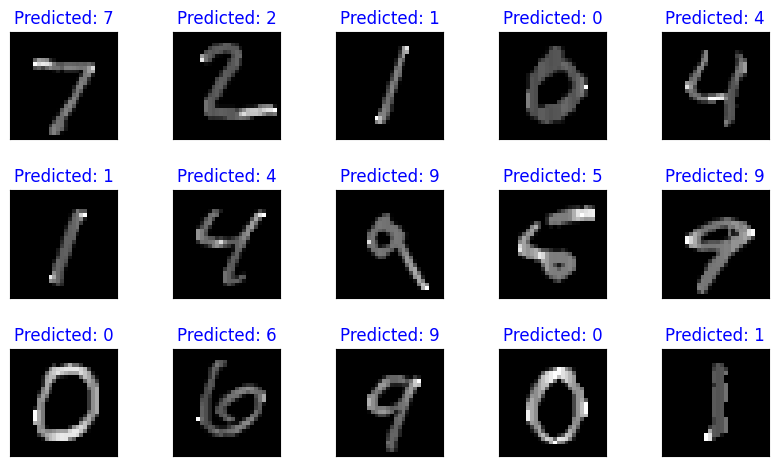

In [39]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
for i in range(15):
    plt.subplot(5, 5, i + 1)
    plt.tight_layout()
    plt.imshow(X_test[i], cmap='gray', interpolation=None)
    if (np.argmax(predict[i])) == y_test[i]:
        title_color = 'blue'
    else:
        title_color = 'red'
    plt.title("Predicted: {}".format(np.argmax(predict[i])), color=title_color)
    plt.xticks([])
    plt.yticks([])

plt.show()

In [42]:
keras2ascii(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####     28   28
             Flatten   ||||| -------------------         0     0.0%
                       #####         784
               Dense   XXXXX -------------------    100480    84.9%
                relu   #####         128
               Dense   XXXXX -------------------     16512    14.0%
                relu   #####         128
               Dense   XXXXX -------------------      1290     1.1%
             softmax   #####          10
